In [164]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings ('ignore')
import numpy as np

In [122]:
Cars = pd.read_csv ('Cars.csv')
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [123]:
Cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [124]:
#check for missing values
Cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

## Correlation Matrix

In [125]:
Cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatterplot between variables along with histograms

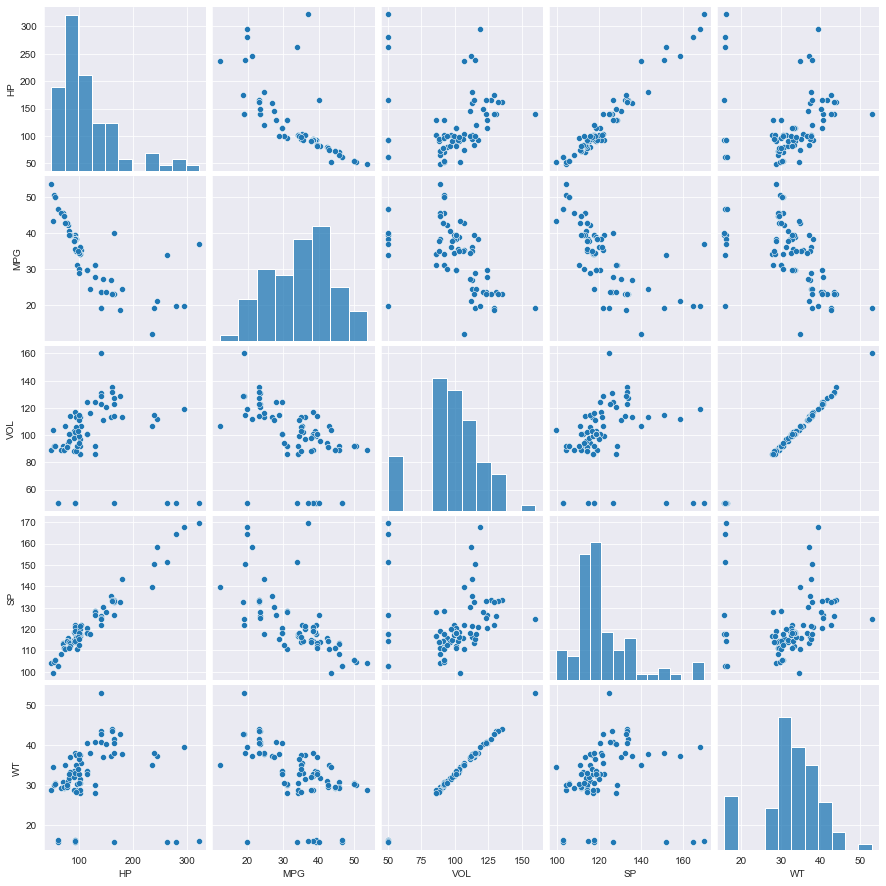

In [126]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Cars)

## Bulding model

In [127]:
model = smf.ols ('MPG~HP+VOL+SP+WT',data=Cars).fit()

In [128]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.54e-23
Time:                        15:21:15   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
# Coefficient
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [130]:
# Checking the Pvalue / Tvalue
print (model.tvalues, '\n', model.pvalues)

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64 
 Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


In [131]:
# rsquared and adj_rsquared
print (model.rsquared,model.rsquared_adj)

0.7705372737359844 0.7584602881431415


## Simple Linear Regression model

In [132]:
ml_h = smf.ols ('MPG~HP',data=Cars).fit()
print (ml_h.tvalues,'\n',ml_h.pvalues)

Intercept    29.722460
HP           -9.357053
dtype: float64 
 Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64


In [133]:
ml_v = smf.ols ('MPG~VOL',data=Cars).fit()
print (ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [134]:
ml_w = smf.ols ('MPG~WT',data=Cars).fit()
print (ml_w.tvalues,'\n',ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [135]:
ml_s = smf.ols ('MPG~SP',data=Cars).fit()
print (ml_s.tvalues,'\n',ml_s.pvalues)

Intercept    13.695100
SP           -8.406007
dtype: float64 
 Intercept    1.457105e-22
SP           1.407325e-12
dtype: float64


## Calculating VIF (Variance Inflation Factor)

In [136]:
# Residual Analysisrsq_hp = smf.ols ('HP~WT+VOL+SP',data=Cars).fit().rsquared
rsq_hp = smf.ols ('HP~WT+VOL+SP',data=Cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_wt = smf.ols ('WT~HP+VOL+SP',data=Cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)
rsq_vol = smf.ols ('VOL~HP+WT+SP',data=Cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)
rsq_sp = smf.ols ('SP~HP+VOL+WT',data=Cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)
print (vif_hp,vif_wt,vif_vol,vif_sp)

19.926588974998563 639.5338175572624 638.8060836592878 20.00763878305008


In [137]:
# Storing vif values in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame = pd.DataFrame (d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


## Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

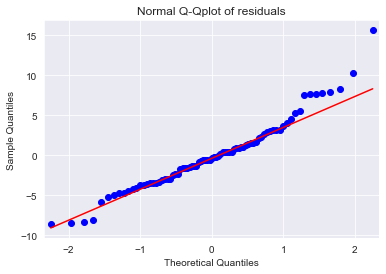

In [138]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title ('Normal Q-Qplot of residuals')
plt.show()

In [139]:
list(np.where(model.resid > 10))

[array([ 0, 76], dtype=int64)]

 # Residual Plot for Homoscedasticity
 ### Checking uniformity of resuduals

In [140]:
def get_standardized_values (vals):
    return (vals  -vals.mean())/vals.std()

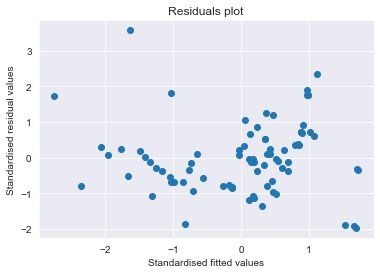

In [141]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residuals plot')
plt.xlabel ('Standardised fitted values')
plt.ylabel ('Standardised residual values')
plt.show()

#  Residuals vs Regressors

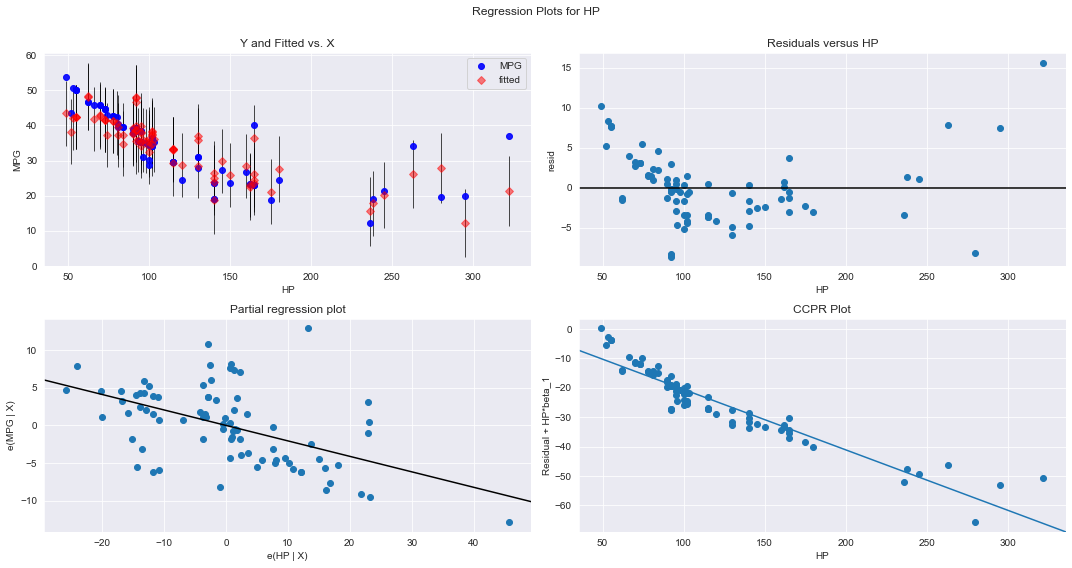

In [142]:
fig = plt.figure(figsize =( 15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

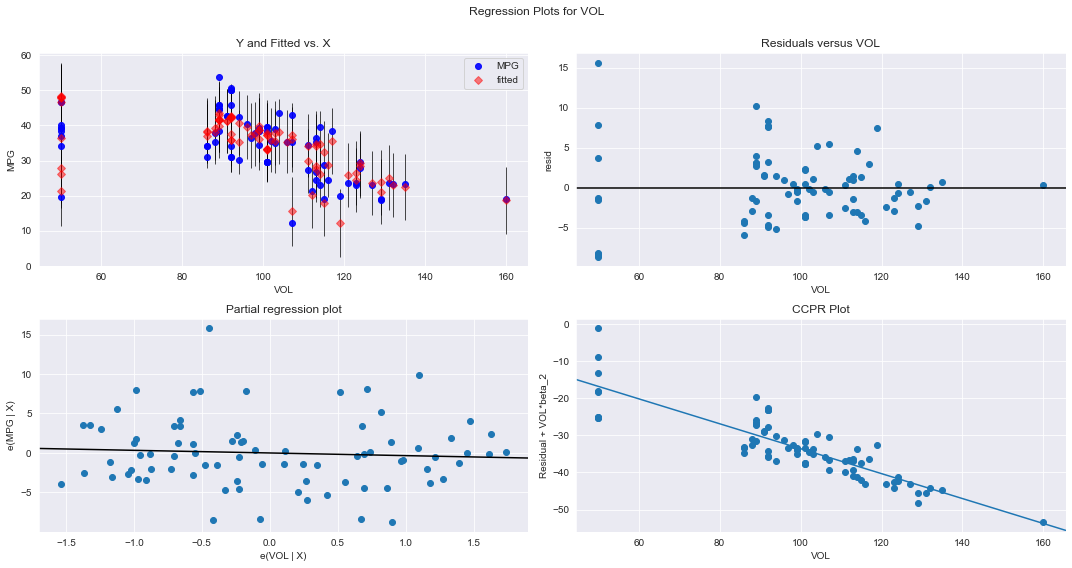

In [143]:
fig = plt.figure (figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

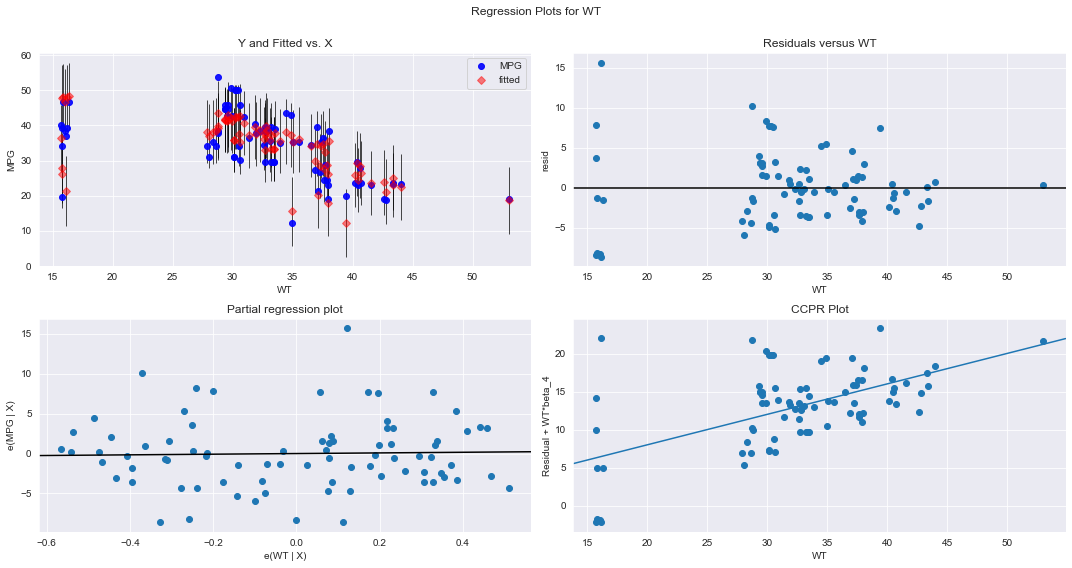

In [144]:
fig = plt.figure (figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

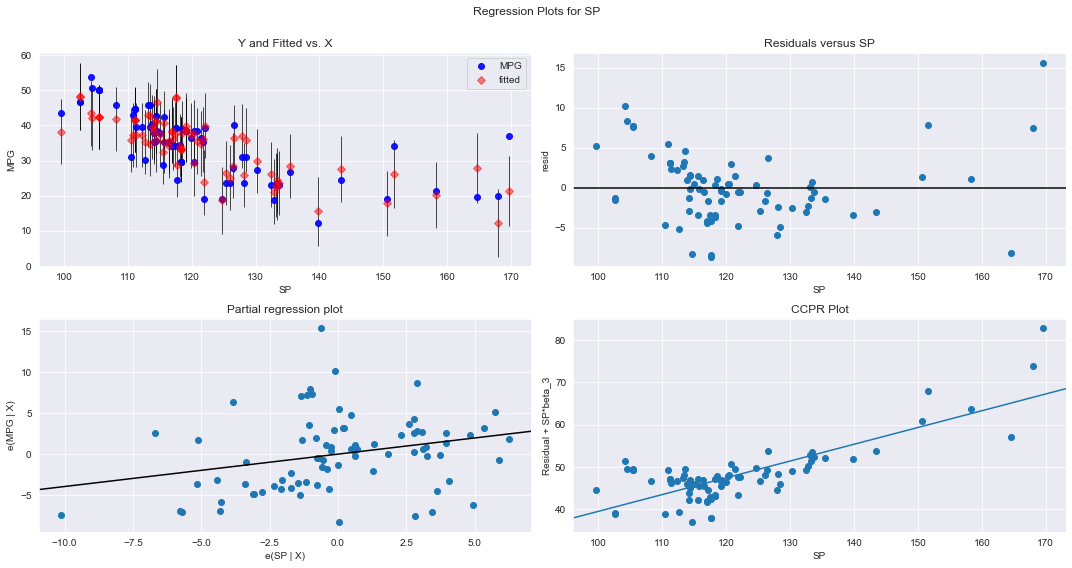

In [145]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

## Cook’s Distance

In [146]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

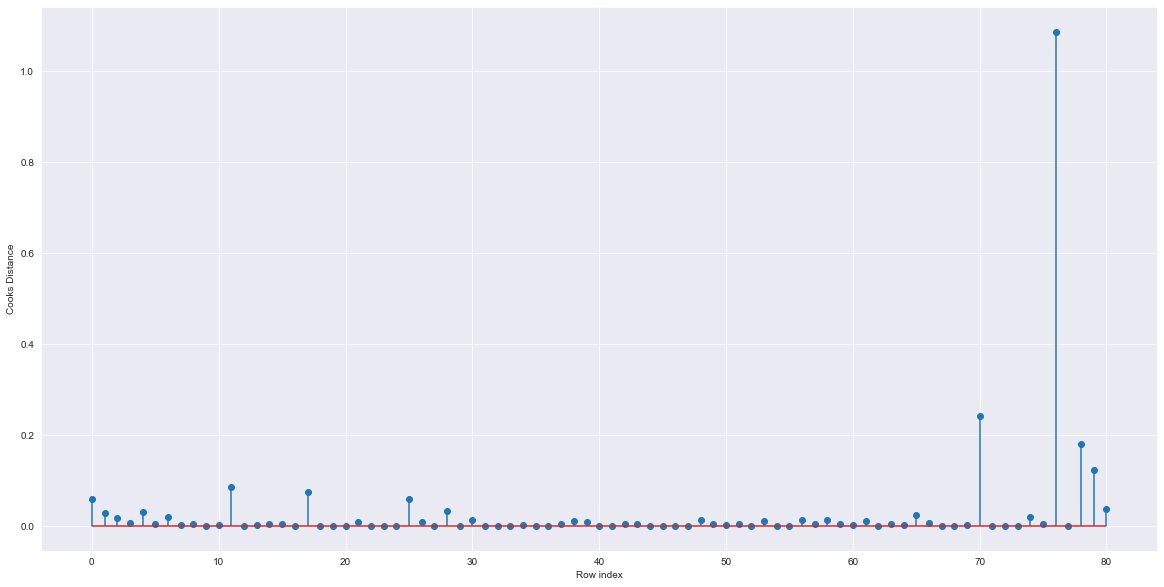

In [147]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize = (20,10))
plt.stem(np.arange(len(Cars)), np.round(c,3))
plt.xlabel ('Row index')
plt.ylabel ('Cooks Distance')
plt.show()

In [148]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998180014)

## High Influence points 

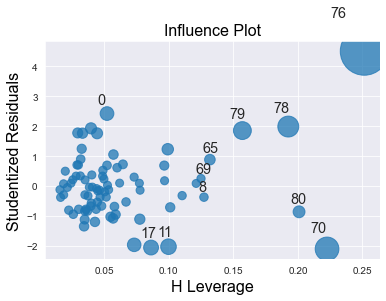

In [149]:
influence_plot(model)
plt.show()

In [150]:
Cars.shape

(81, 5)

In [151]:
k = Cars.shape[1] #Columns
n = Cars.shape[0] #Rows
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff # Remove everything beyond 0.22

0.2222222222222222

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [152]:
Cars[Cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [153]:
# See the Difference in HP and Other Variables 
Cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [154]:
# Load new data
Cars_new = pd.read_csv ('Cars.csv')

In [199]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Cars1 = Cars_new.drop(Cars.index[[70,76]],axis = 0).reset_index()
Cars1 #Rows reduced from 81 to 79

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [200]:
# Drop the index column
Cars1 = Cars1.drop(['index'],axis=1)

In [201]:
Cars1.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Build new model

In [202]:
# Exclude Variable 'WT' and generate R-squared and AIC Values
final_ml_v = smf.ols ('MPG~VOL+SP+HP',data = Cars1).fit()
final_ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.65e-27
Time:                        15:39:33   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
SP             0.4415      0.141      3.124      0.003       0.160       0.723
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8161692010376007, 446.11722639447726)

#### Model rsquared value improved to 0.816 from 0.77

In [198]:
# Exclude Variable 'VOL' and generate R-squared and AIC Values
final_ml_w = smf.ols ('MPG~WT+HP+SP',data = Cars1).fit()
(final_ml_w.rsquared,final_ml_w.aic)

(0.8666713380938281, 409.5842851756104)

###  Comparing the above two models, 'final_ml_v' has high R-squared and low 'AIC' value hence including variable 'VOL' will resolve the multi collinearity problem

## Cook's Distance

In [204]:
model_influence_v = final_ml_v.get_influence()
(c_v, _) = model_influence_v.cooks_distance

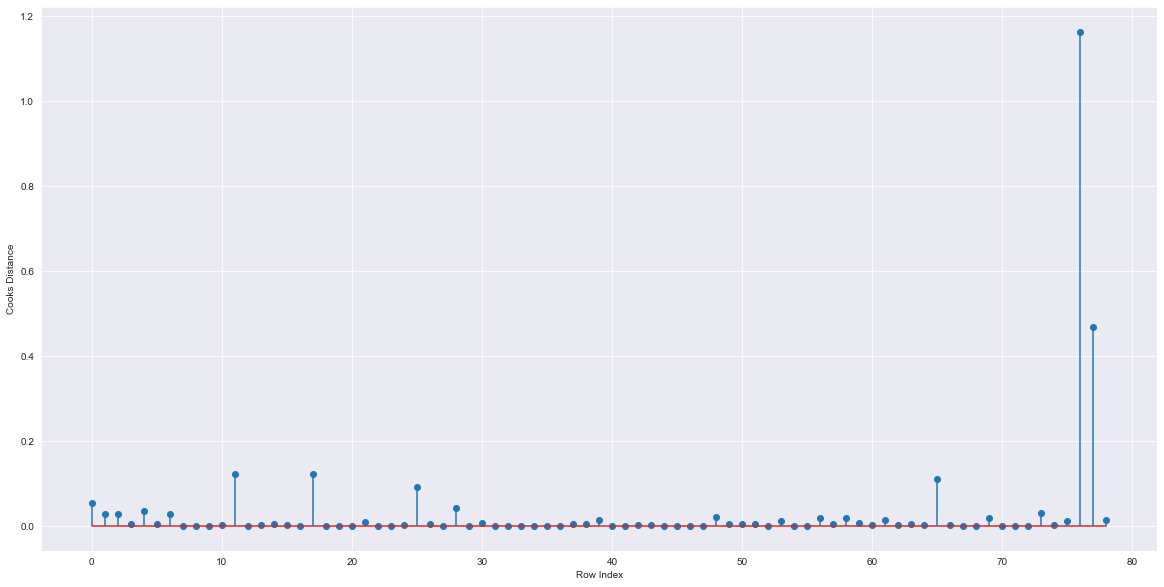

In [205]:
fig = plt.subplots (figsize=(20,10))
plt.stem(np.arange(len(Cars1)),np.round(c_v,3));
plt.xlabel ('Row Index')
plt.ylabel ('Cooks Distance');
plt.show()

In [181]:
#index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

(76, 1.1629387469135095)

In [211]:
# Drop 76 and 77 observation
Cars2 = Cars1.drop(Cars1.index[[76,77]],axis=0)

In [213]:
Cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 78
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      77 non-null     int64  
 1   MPG     77 non-null     float64
 2   VOL     77 non-null     int64  
 3   SP      77 non-null     float64
 4   WT      77 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.6 KB


In [216]:
Cars3 = Cars2.reset_index()
Cars3

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [217]:
Cars4 = Cars3.drop(['index'],axis=1)

In [218]:
Cars4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [220]:
#Build the model on the new data
final_ml_v1 = smf.ols ('MPG~HP+SP+VOL',data=Cars4).fit()
(final_ml_v1.rsquared,final_ml_v1.aic)

(0.8669636111859063, 409.4153062719508)

In [221]:
#Again check for influencers
model_influence_v1 = final_ml_v1.get_influence()
(c_v1,_) = model_influence_v1.cooks_distance

<function matplotlib.pyplot.show(close=None, block=None)>

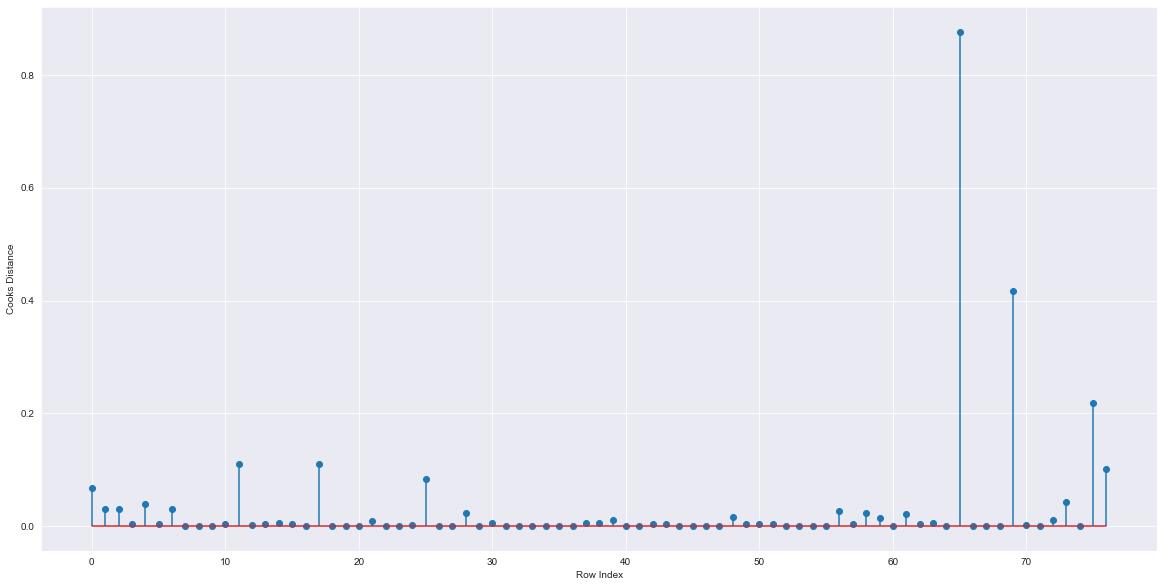

In [226]:
fig = plt.subplots (figsize=(20,10))
plt.stem(np.arange(len(Cars4)),np.round(c_v1,3));
plt.xlabel ('Row Index')
plt.ylabel ('Cooks Distance')
plt.show

In [227]:
#index of the data points where c is more than .5
(np.argmax(c_v1),np.max(c_v1))

(65, 0.8774556986296822)

In [229]:
Cars5 = Cars4.drop(Cars4.index[65],axis=0)

In [240]:
Cars6 = Cars5.reset_index()

In [242]:
Cars6.head()

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149


In [244]:
Cars7 = Cars6.drop (['index'],axis=1)

In [245]:
Cars7.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [248]:
#Cheking the accuracy of model
final_model = smf.ols ('MPG~HP+SP+VOL',data=Cars7).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.87e-34
Time:                        15:56:50   Log-Likelihood:                -191.90
No. Observations:                  76   AIC:                             391.8
Df Residuals:                      72   BIC:                             401.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2567     10.793      1.414      0.162      -6.258      36.772
HP            -0.2970      0.030    -10.055      0.000      -0.356      -0.238
SP             0.5203      0.115      4.538      0.000       0.292       0.749
VOL           -0.1048      0.021     -4.887      0.000      -0.148      -0.062
==============================================================================
Omnibus:                       12.199   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.710
Skew:                           0.941   Prob(JB):                      0.00174
Kurtosis:                       3.685   Cond. No.                     5.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  The Final has the improved Rsquared of 0.88 from 0.77 and AIC is reduced to 391.8 from 477.9

In [249]:
Cars7.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## Predicting new model

In [251]:
# New data for Prediction
new_data = pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=[1])

In [252]:
final_model.predict(new_data)

1    46.48671
dtype: float64

In [253]:
final_model.predict(Cars.iloc[0:5,])

0    45.579291
1    44.146382
2    44.146382
3    43.853072
4    44.220177
dtype: float64

In [254]:
Cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [255]:
# New data for Prediction
new_data1 = pd.DataFrame({'HP':49,'VOL':89,'SP':104.18,'WT':28.76},index=[1])
final_model.predict (new_data1)

1    45.576506
dtype: float64

In [257]:
final_model.predict (Cars_new.iloc[0:5])

0    45.579291
1    44.146382
2    44.146382
3    43.853072
4    44.220177
dtype: float64

In [259]:
pred_y = final_model.predict(Cars_new)
pred_y

0     45.579291
1     44.146382
2     44.146382
3     43.853072
4     44.220177
        ...    
76     2.608188
77    10.849230
78    10.768568
79     2.534742
80     6.696138
Length: 81, dtype: float64